## Joining Data in Database
In this Jupyter Notebook file we are going to take our data that was added to the database (make sure you run files to create and insert data into database before running anything in this file) and joining it so we can view all of the data from each matching movie from our datasets together in one place.

### Import <code>sqlite3</code> package and connect to the <code>movies.db</code> database and create a <code>cursor</code> object

In [4]:
import sqlite3
connection = sqlite3.connect('movies.db')
cursor = connection.cursor() #, d.director_name, g.genre_name

In [ ]:
import matplotlib.pyplot as plt

cursor.execute('DROP VIEW IF EXISTS actor_popularity')

cursor.execute('''
                CREATE VIEW actor_popularity AS 
                SELECT s.star_name AS actors_name, COUNT(mbo.movie_name) AS movie_number, 
                CAST(AVG(mbo.world_wide_bo) AS INTEGER) AS avg_bo, 
                CAST(AVG(mbo.domestic_amount) AS INTEGER) AS avg_domestic,
                CAST(AVG(mbo.foreign_amount) AS INTEGER) AS avg_foreign,
                CAST(AVG(mbo.domestic_percentage) AS INTEGER) AS avg_dom_pct,
                CAST(AVG(mbo.foreign_percentage) AS INTEGER) AS avg_frn_pct
                FROM movies_box_office AS mbo
                INNER JOIN movie_reviews AS mr ON mbo.movie_name = mr.movie_name
                INNER JOIN imdb_movies AS im ON mbo.movie_name = im.movie_name
                INNER JOIN movie_stars AS ms ON im.imdb_movies_id = ms.movie_id
                INNER JOIN stars AS s ON ms.star_id = s.star_id
                GROUP BY s.star_name
                ORDER BY movie_number DESC, avg_bo DESC
               ''')




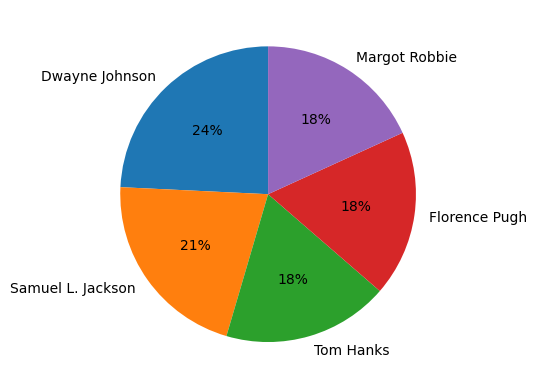

In [55]:



# Data preparation
cursor.execute('SELECT movie_number FROM actor_popularity LIMIT 5')
num_of_movies = [item[0] for item in cursor.fetchall()]
cursor.execute('SELECT actors_name FROM actor_popularity LIMIT 5')
actors = [item[0] for item in cursor.fetchall()]

# Create pie chart
plt.pie(num_of_movies, labels=actors, autopct='%d%%', startangle=90)

# Display the chart
plt.show()


In [ ]:
connection.close()